<a href="https://colab.research.google.com/github/prahlad08/DLithe-Internship/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("/content/USA_Housing.csv")

**1.EXPLORATORY DATA ANALYSIS AND DATA VISUALIZATION**

**Initial appearance of the dataset**





In [3]:
data


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06,USS Wallace\nFPO AE 73316


Since we do not know the relation between address and target price ,we will encode it to a integer and check the correlation later on .If they do not correlate the we will drop it later on  

In [4]:
labelEncoder= preprocessing.LabelEncoder()
data['Address']=labelEncoder.fit_transform(data['Address'].unique())
len(data['Address'].unique())

5000

**The data set does'nt have any null values as shown below**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 273.6 KB


**Visualizing the data using pandas plot**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f379cd2ced0>,
      dtype=object)

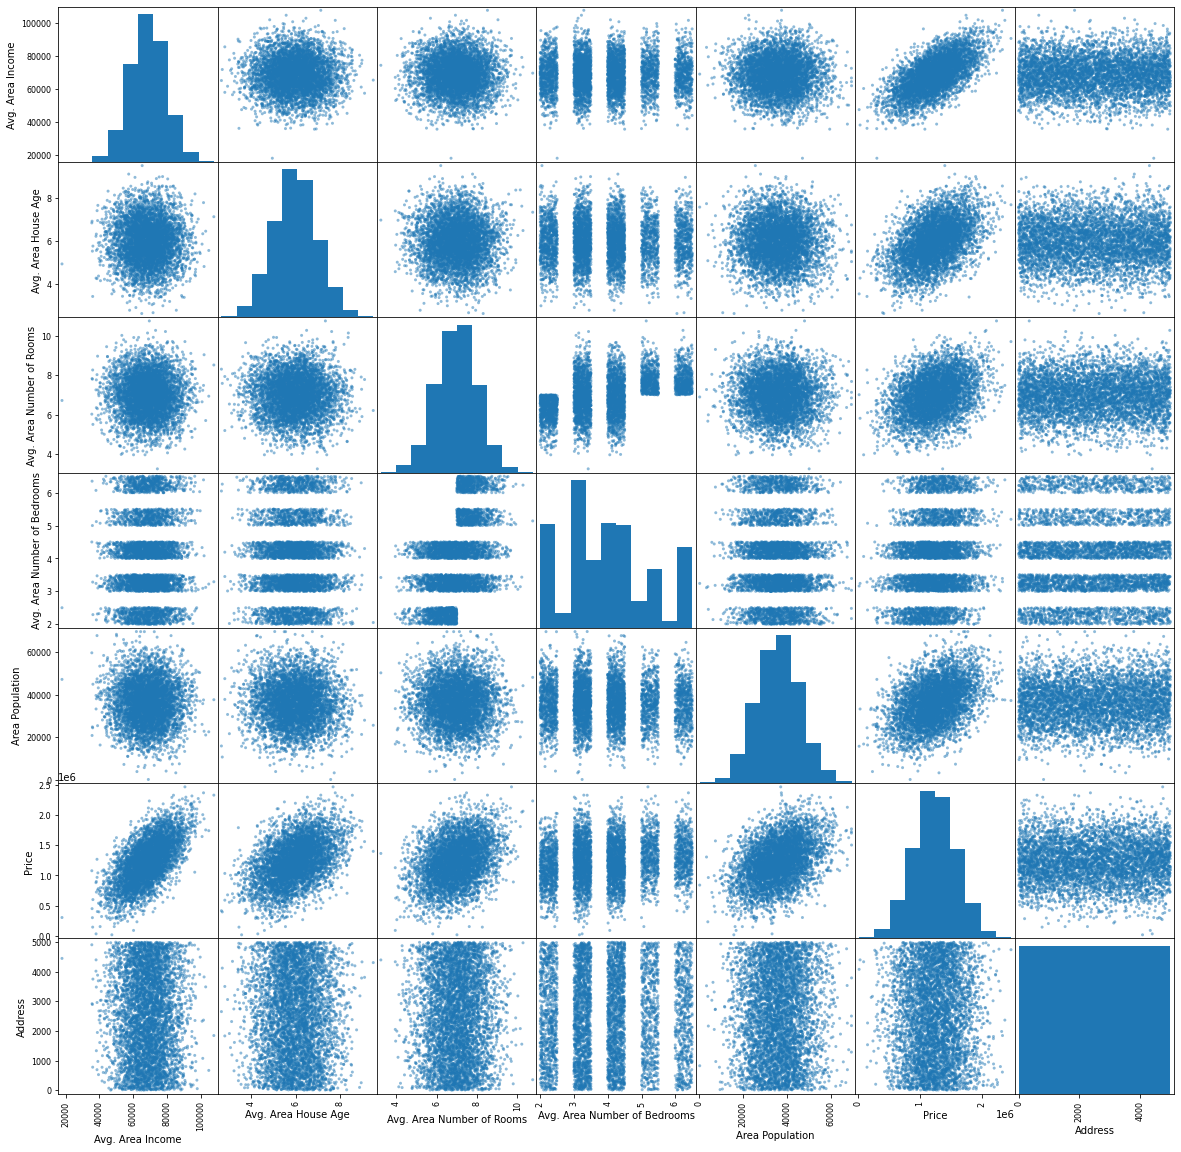

In [6]:
scatter_matrix(data,figsize=(20,20),grid=True)

**Examining the correlation between the dataset features**

In [7]:
data.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734,-0.000479
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543,-0.007904
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664,0.012017
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071,0.021650
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556,0.019739
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000,0.008710
Address,-0.000479,-0.007904,0.012017,0.021650,0.019739,0.008710,1.000000


**Heatmap depicting the correlation**

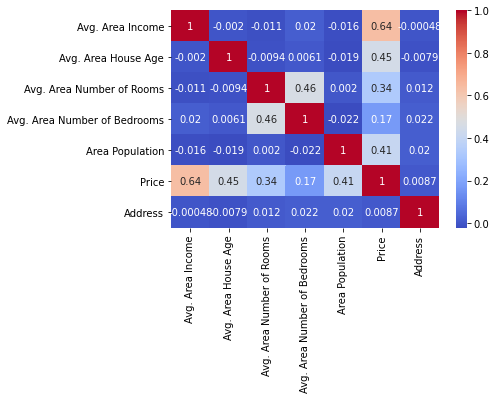

In [8]:

sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

**Clearly we can see that the address feature inclulded here is not showing proper relation with the features nor the target function .Hence we drop it**

**2.Data PreProcessing**

In [9]:
data.drop(['Address'],axis=1,inplace=True)

In [10]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


**3.Data cleaning** 
Luckily the data does'nt have any null values or even missing values 

**4.Train test split** : using sklearn preprocessing module 

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x=data.drop("Price",axis=1)
y=data['Price']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=56)

In [14]:
print("shape of the data after splitting ")
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

shape of the data after splitting 
(3350, 5)
(3350,)
(1650, 5)
(1650,)


**5.Algorithm Selection**

The problem is a multivariate linear regression .The target function Price of the house is a continuous geometrically.Hence we try to use the sklearn linear regression model. 

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
model = LinearRegression()

**6.Training and testing**

-Training 

In [17]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

-Testing

In [18]:
print("Training accuracy :",model.score(x_train,y_train)*100,"%")

Training accuracy : 91.48855393836762 %


In [19]:
print("Testing accuracy :",model.score(x_test,y_test)*100,"%")

Testing accuracy : 92.41197904585232 %


In [20]:
y_pred=model.predict(x_test)
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


Coefficient of determination: 0.92


**The closeness of the training and testing accuracy imply that the model is not overfitted**


Also the Coefficient of determination close to 1 indicating the quality of the prediction .

**7.Conclusion and observation**

From the above conducted training and testing it is observed that the the data fits well into the model producing a 90 odd %.In other words if features such as 
Average area income ,
Average house age ,
Average area no. of rooms,
Average area no. of bedrooms,
Average area population is given then the price of such a house can predicted .
